## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

import warnings
warnings.filterwarnings('ignore')

## Read Files

In [2]:
df_train = pd.read_csv('mnist_train.csv')

df_test  = pd.read_csv('mnist_test.csv')
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(f'Train data shape: {df_train.shape}\n\nTest data shape: {df_test.shape}')

Train data shape: (60000, 785)

Test data shape: (10000, 785)


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [5]:
df_train.label.nunique()

10

## Split Data X and Y

In [6]:
x_train = df_train.drop(['label'],axis = 1)
y_train = df_train['label']

x_test = df_test.drop(['label'],axis = 1)
y_test = df_test['label']

In [7]:
# After splinting X and Y shape of X train and test data

print(f'X train data: {x_train.shape}\n\nX test data: {x_test.shape}')

X train data: (60000, 784)

X test data: (10000, 784)


In [8]:
# Convet to array it becomes independent features
x_train = np.array(x_train)
x_test = np.array(x_test)

# Scalling  features
xtrain =  x_train / 255
xtest = x_test / 255

In [9]:
# Converts a class vector (integers) to binary class matrix.
# for use with `categorical_crossentropy`


ytrain=np_utils.to_categorical(y_train)

ytest=np_utils.to_categorical(y_test)

## Training Model

In [10]:
model = Sequential()
model.add(Dense(units = 200, input_shape=(784,), activation ='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
          
model.fit(xtrain, ytrain, epochs=11)    

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2362 - accuracy: 0.9319
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0999 - accuracy: 0.9708
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669 - accuracy: 0.9792
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0488 - accuracy: 0.9848
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0368 - accuracy: 0.9880
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9916
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 8/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 9/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 10/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

In [11]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9808


[0.07796523720026016, 0.9807999730110168]

In [12]:
y_prediction = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [13]:
y_prediction[1]
# from 0-9 the one which as highest score

array([6.2488528e-14, 8.7777616e-09, 1.0000000e+00, 3.8711343e-12,
       4.6717413e-20, 3.9755468e-13, 6.1889994e-14, 6.8959560e-22,
       5.5007460e-11, 4.5939624e-21], dtype=float32)

In [14]:
np.argmax(y_prediction[1])

2

In [15]:
y_test[:5]

# These are the y test first 5 Ytest[Target], Lets see if the model is predicting the same value with the Xtest[Features]

0    7
1    2
2    1
3    0
4    4
Name: label, dtype: int64

In [16]:
y_predicted = [np.argmax(i) for i in y_prediction]
y_predicted[:5]

#model works fine 

[7, 2, 1, 0, 4]

## Confusion Matrix

In [17]:

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted)

Text(95.72222222222221, 0.5, 'Truth')

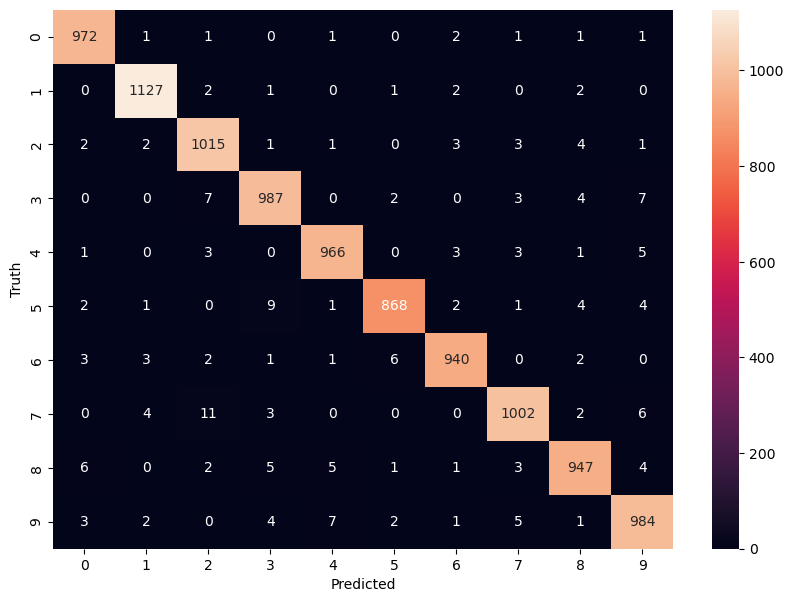

In [18]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')